<a href="https://colab.research.google.com/github/rjroman/new-pro/blob/main/Lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
lungcancer_dataset = pd.read_csv('/content/survey lung cancer.csv') 

In [ ]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_memory=True, memory_map=False,

In [ ]:
# printing the first 5 rows of the dataset
lungcancer_dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
# number of rows and Columns in this dataset
lungcancer_dataset.shape

(309, 16)

In [ ]:
# getting the statistical measures of the data
lungcancer_dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
lungcancer_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [ ]:
lungcancer_dataset.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
lungcancer_dataset["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

In [ ]:
lungcancer_dataset["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [ ]:
lungcancer_dataset['GENDER'] = lungcancer_dataset['GENDER'].map({'F': 0, 'M': 1})

lungcancer_dataset['LUNG_CANCER'] = lungcancer_dataset['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
lungcancer_dataset.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object

In [ ]:
def custom_palette(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)

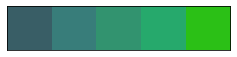

In [ ]:
pal = ["#395e66","#387d7a","#32936f","#26a96c","#2bc016"]
custom_palette(pal)

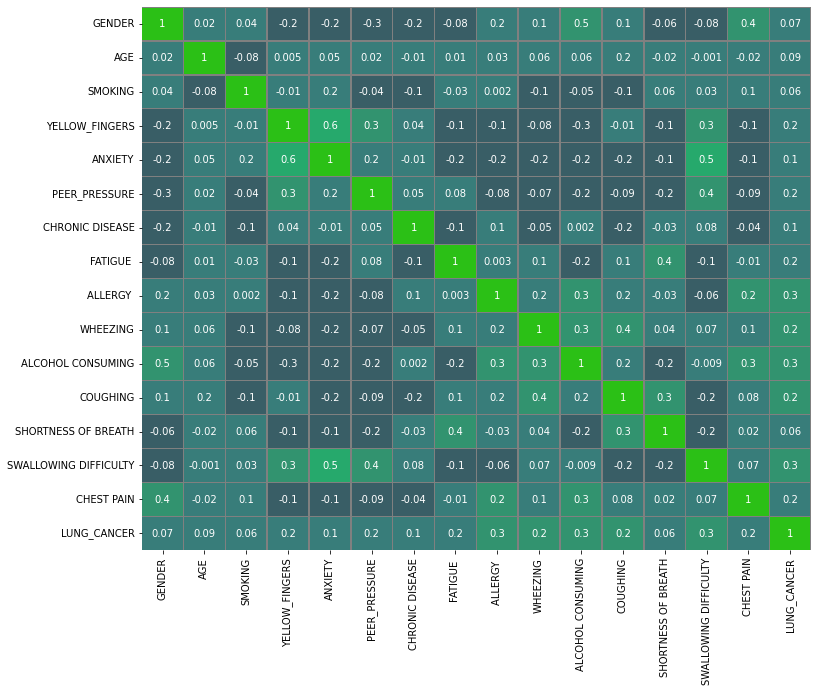

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(lungcancer_dataset.corr(), annot=True, fmt='.1g', cmap=pal, cbar=False, linewidths=0.5, linecolor='grey');

In [ ]:
print ('Total Healthy Patients : {} '.format(lungcancer_dataset.LUNG_CANCER.value_counts()[0]))
print ('Total Suspected Patients : {} '.format(lungcancer_dataset.LUNG_CANCER.value_counts()[1]))

Total Healthy Patients : 39 
Total Suspected Patients : 270 


In [ ]:
values = lungcancer_dataset['LUNG_CANCER'].value_counts().tolist()
names = list(dict(lungcancer_dataset['LUNG_CANCER'].value_counts()).keys())

px.pie(lungcancer_dataset, values=values, names=names, hole = 0.5,
       color_discrete_sequence=["firebrick", "green"])

Train Test Split

In [ ]:
x = lungcancer_dataset['LUNG_CANCER'].value_counts().index.tolist()
y = lungcancer_dataset['LUNG_CANCER'].value_counts().tolist()

fig = px.bar(x=x, y=y, color=["firebrick", "green"], color_discrete_map="identity",
             labels={
                'x': 'LUNG_CANCER',
                'y': 'count'
                },)
fig.show()

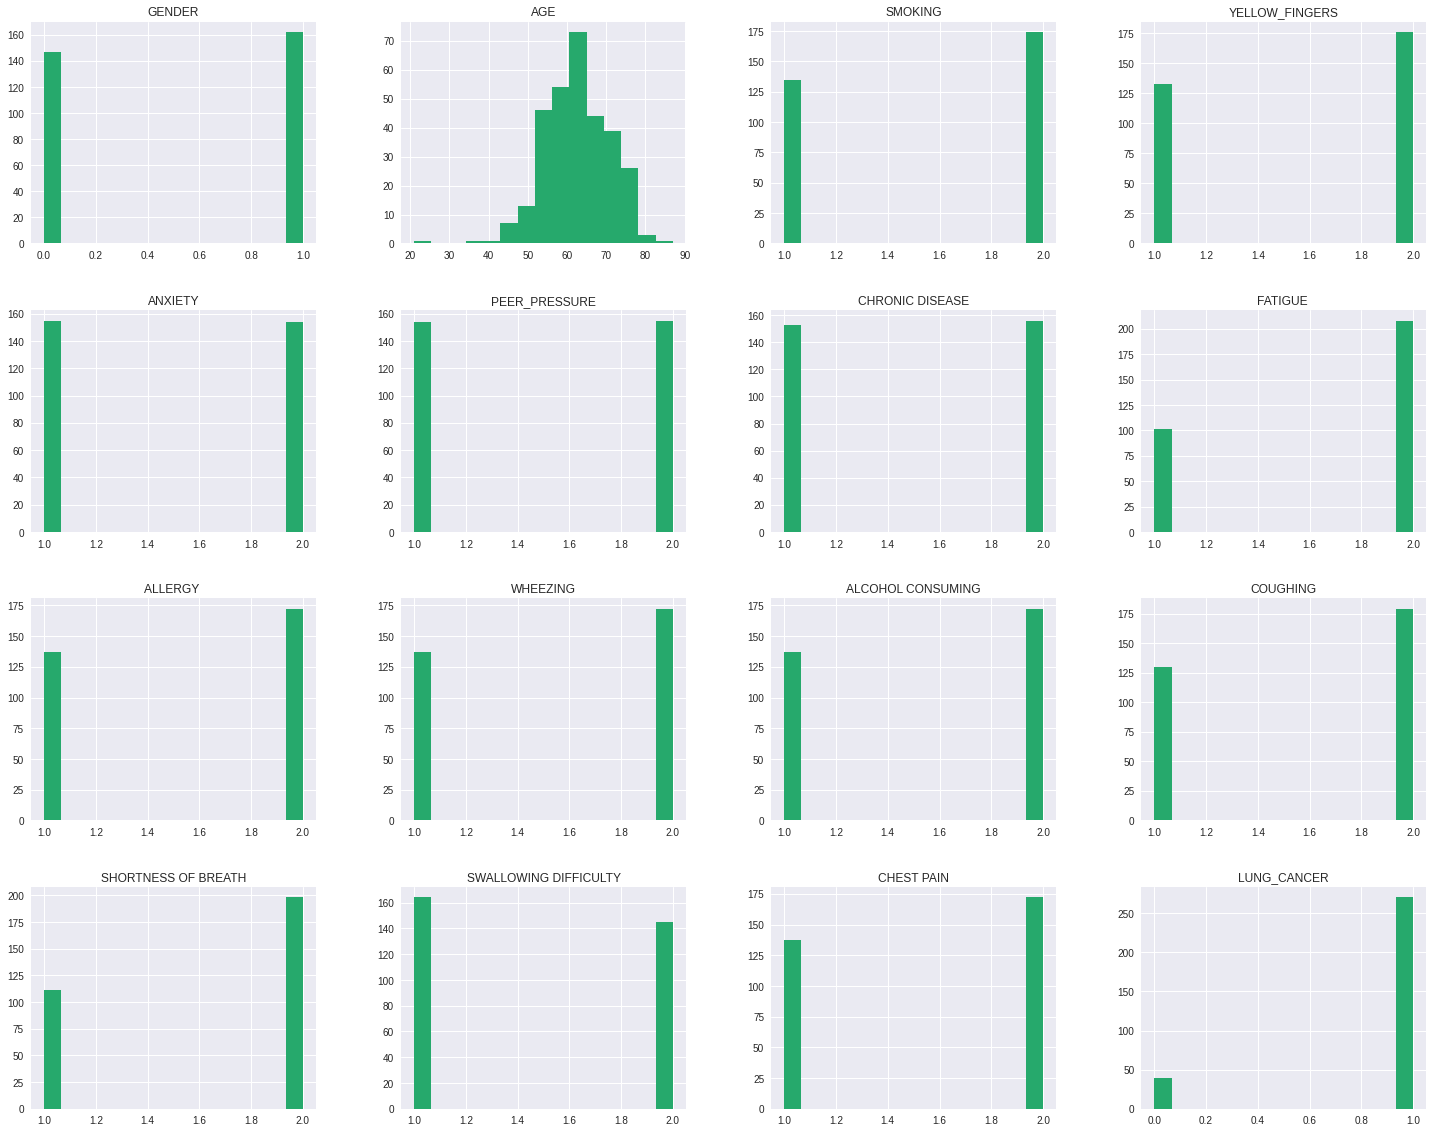

In [ ]:
plt.style.use("seaborn")
lungcancer_dataset.hist(figsize=(25,20), color=pal[3], bins=15);

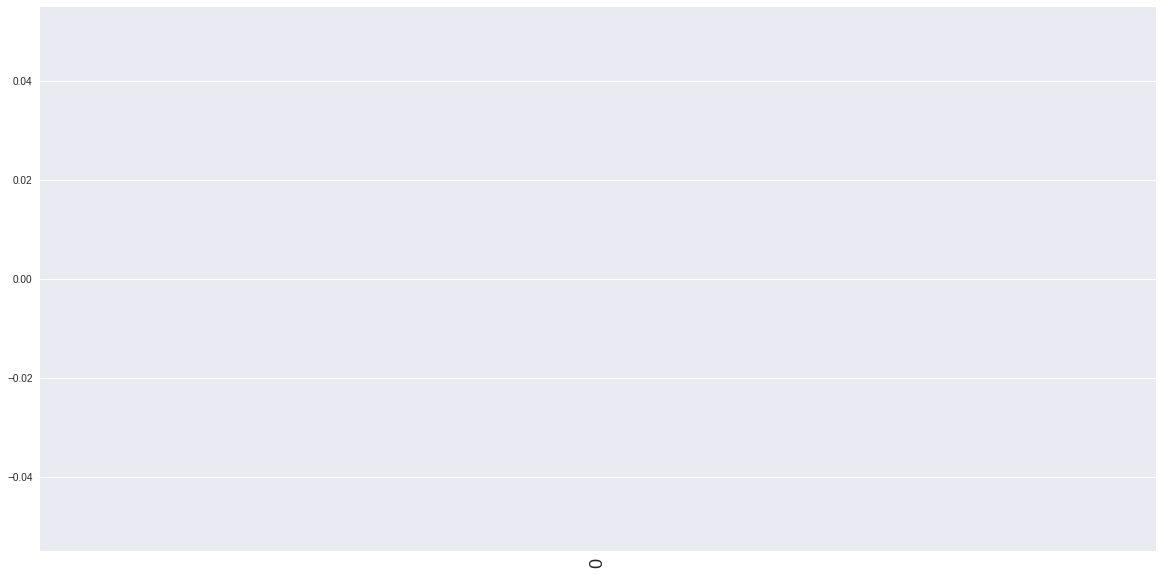

In [ ]:
plt.figure(figsize=(20,10))
sns.boxenplot(lungcancer_dataset = lungcancer_dataset, palette = pal)
plt.xticks(rotation=90, fontsize=18)
plt.show()

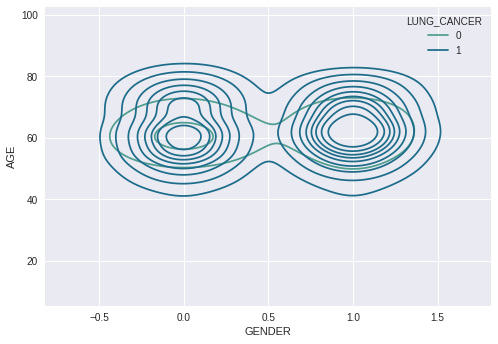

In [ ]:
sns.kdeplot(x=lungcancer_dataset["GENDER"], y=lungcancer_dataset["AGE"], hue =lungcancer_dataset["LUNG_CANCER"], palette="crest");
plt.show()

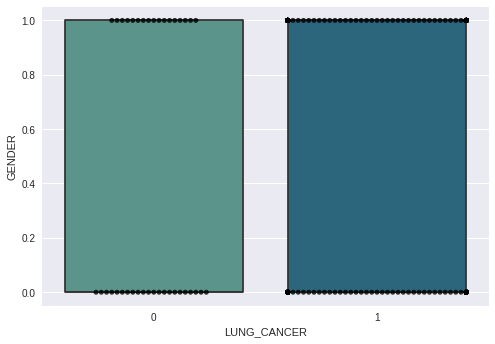

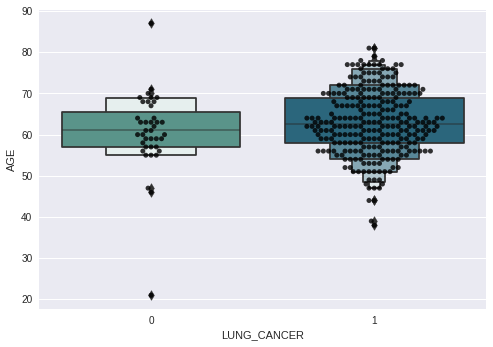

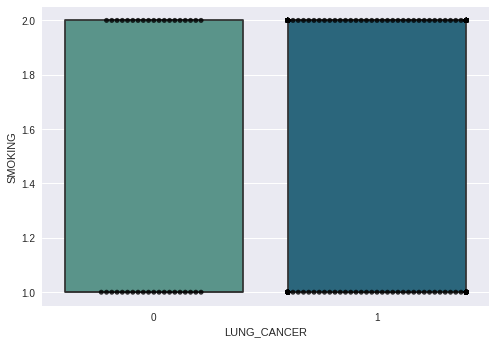

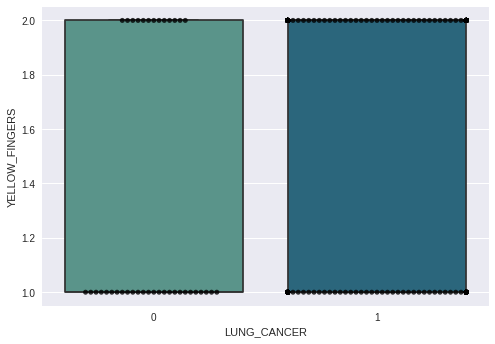

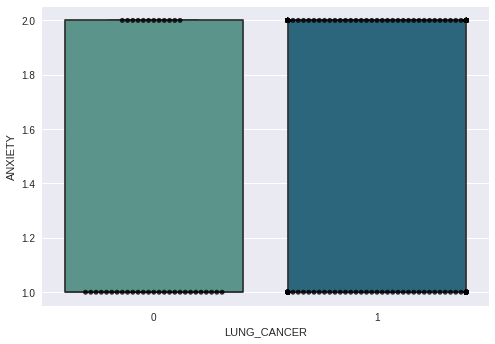

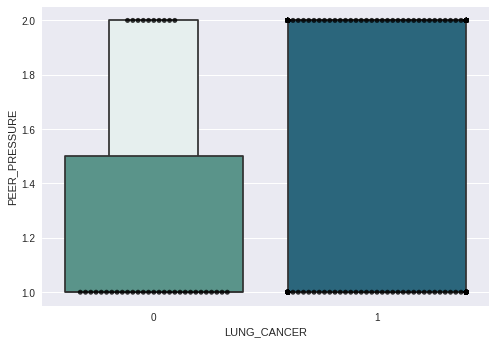

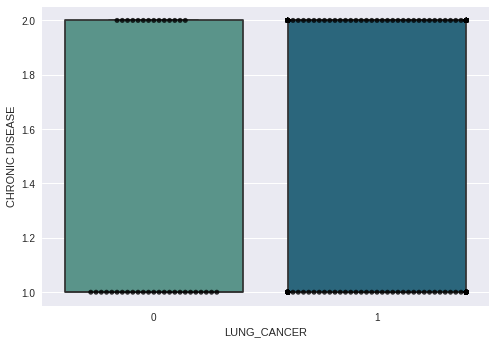

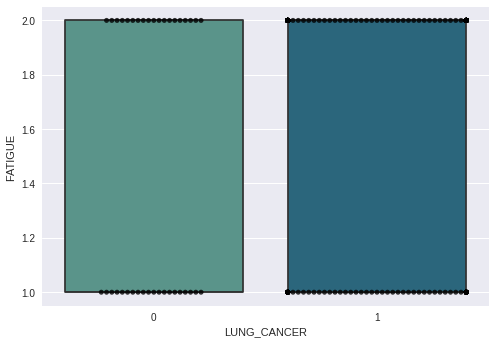

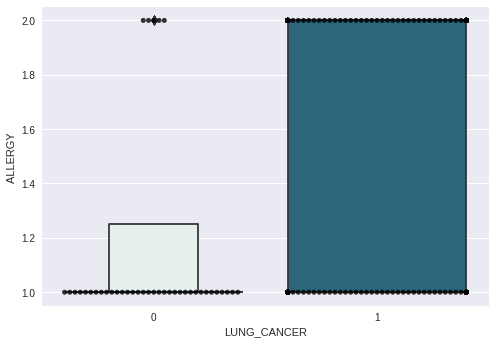

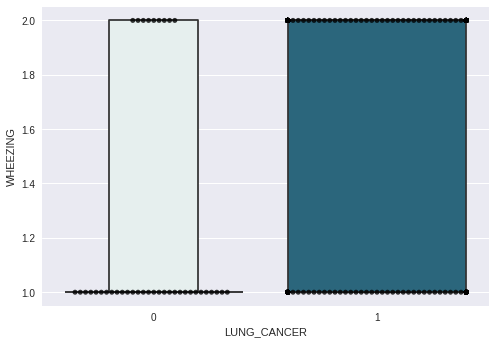

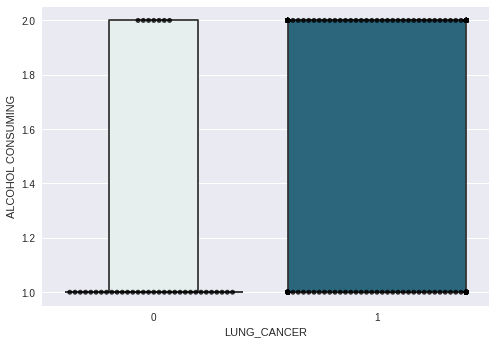

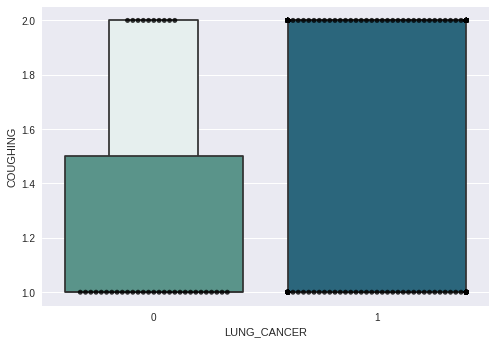

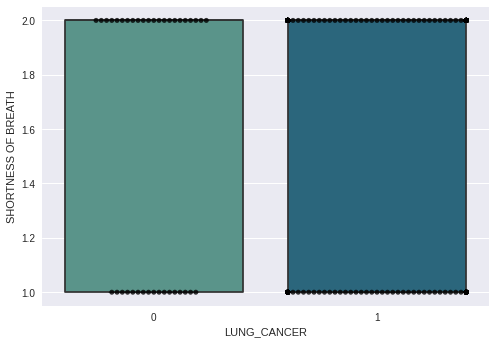

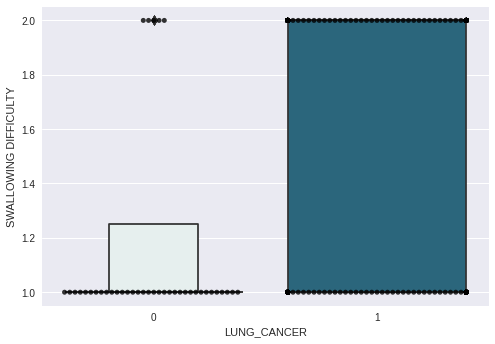

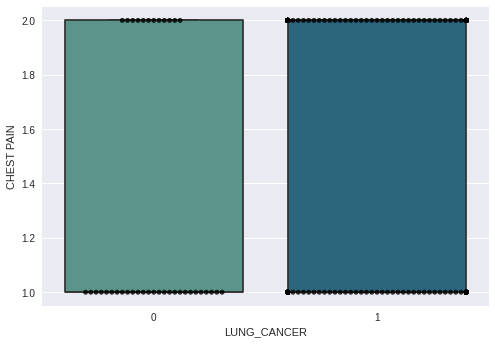

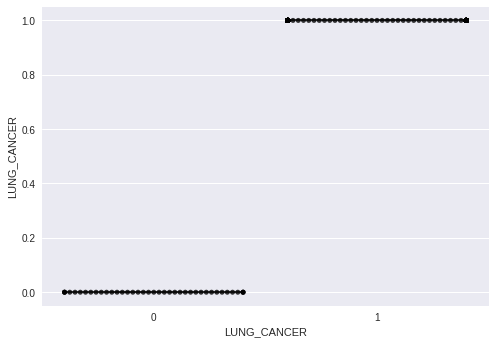

In [ ]:
for i in lungcancer_dataset:
    sns.swarmplot(x =lungcancer_dataset["LUNG_CANCER"], y = lungcancer_dataset[i], color = "black", alpha = 0.8)
    sns.boxenplot(x = lungcancer_dataset["LUNG_CANCER"], y =lungcancer_dataset[i], palette="crest")
    plt.show() 

In [ ]:
# X lungcancer_dataset
X = lungcancer_dataset.drop("LUNG_CANCER", axis=1)
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [ ]:
# y lungcancer_dataset
y = lungcancer_dataset["LUNG_CANCER"]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

In [ ]:
# Adding randomized samples to the data as the data is imbalanced

from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0)
X_train_res, y_train_res = over_samp.fit_resample(X, y)
X_train_res.shape, y_train_res.shape

((540, 15), (540,))

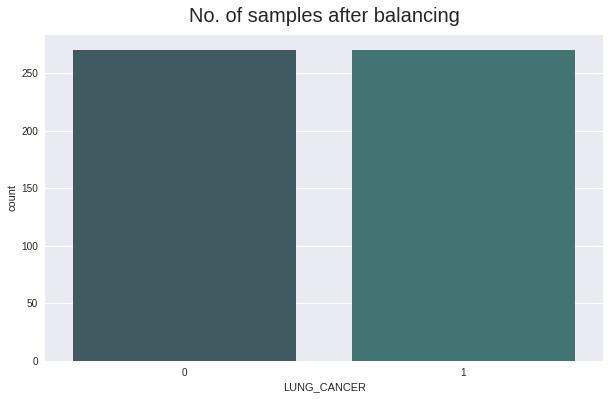

In [ ]:
plt.style.use("seaborn")
plt.figure(figsize=(10,6))
plt.title("No. of samples after balancing", fontsize=20, y=1.02)
sns.countplot(x = y_train_res, palette=pal)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), len(X_test)

(432, 108)

In [ ]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

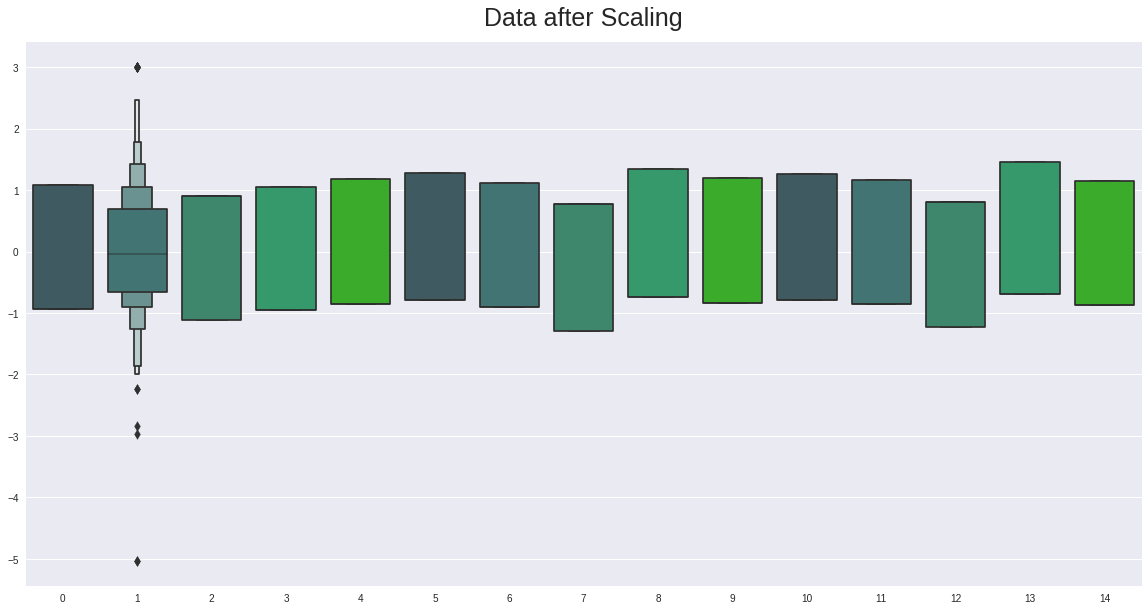

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Data after Scaling", fontsize=25, y=1.02)
sns.boxenplot(data = X_train, palette = pal)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
LinearRegressionScore = lr.score(X_test,y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

Accuracy obtained by Linear Regression model: 64.04214644616874


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 99.07407407407408


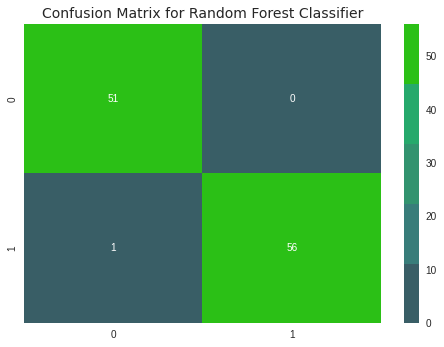

In [ ]:
# Confusion Matrix of Random Forest Classifier
from sklearn.metrics import confusion_matrix, classification_report

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        57

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier model: 93.51851851851852


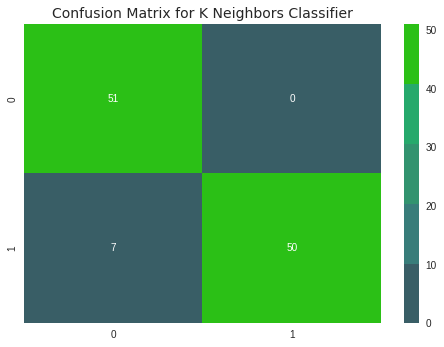

In [ ]:
# Confustion Matrix 

y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        51
           1       1.00      0.88      0.93        57

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier model: 96.29629629629629


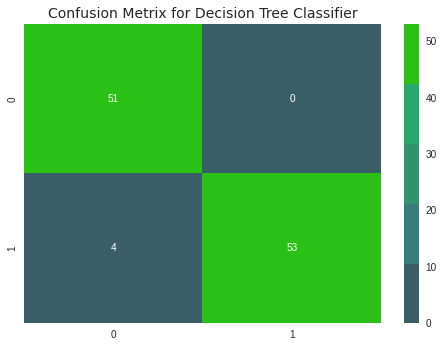

In [ ]:
y_pred_dtc = dtc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.93      0.96        57

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.97      0.96      0.96       108



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 96.29629629629629


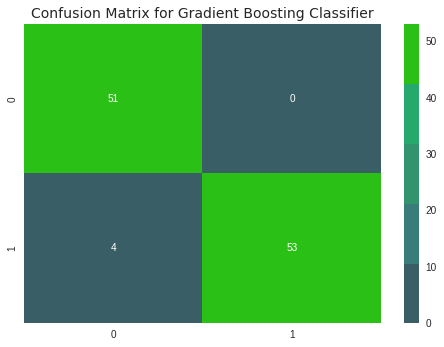

In [ ]:
y_pred_gb = gb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.93      0.96        57

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.97      0.96      0.96       108



In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [ ]:
XGBClassifierScore = xgb.score(X_test,y_test)
print("Accuracy obtained by XGB Classifier model:",XGBClassifierScore*100)

Accuracy obtained by XGB Classifier model: 96.29629629629629


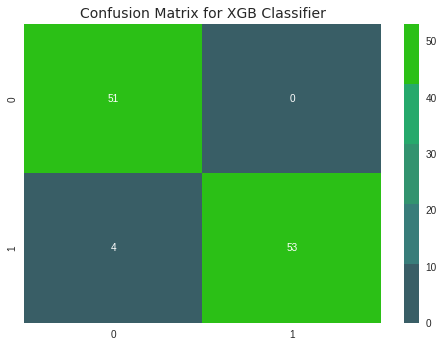

In [ ]:
y_pred_xgb = xgb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cf_matrix, annot=True, cmap=pal)
plt.title("Confusion Matrix for XGB Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.93      0.96        57

    accuracy                           0.96       108
   macro avg       0.96      0.96      0.96       108
weighted avg       0.97      0.96      0.96       108



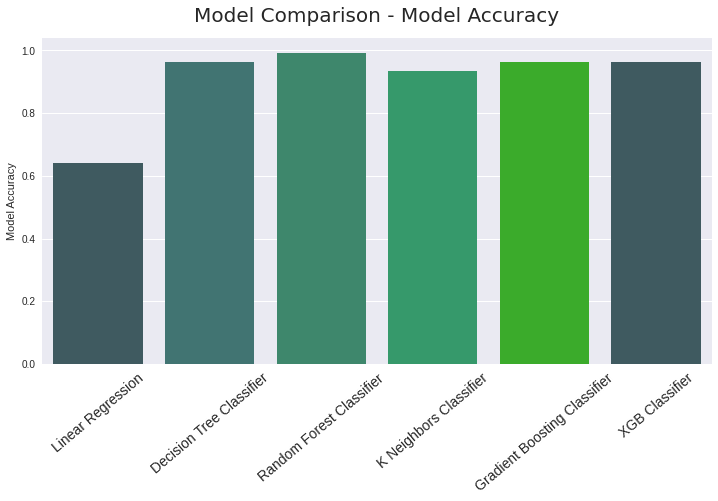

In [ ]:
plt.style.use("seaborn")

x = ["Linear Regression", 
     "Decision Tree Classifier", 
     "Random Forest Classifier", 
     "K Neighbors Classifier",  
     "Gradient Boosting Classifier",
     "XGB Classifier"]

y = [LinearRegressionScore, 
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore,  
     GradientBoostingClassifierScore, 
     XGBClassifierScore]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=x,y=y, palette=pal);
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40, fontsize=14)
plt.title("Model Comparison - Model Accuracy", fontsize=20, fontname="Helvetica", y=1.03)
plt.show()